###1) Calcular ECM y hacer un scatter plot con la recta de regresión

El EMC es:  8.953942751950358


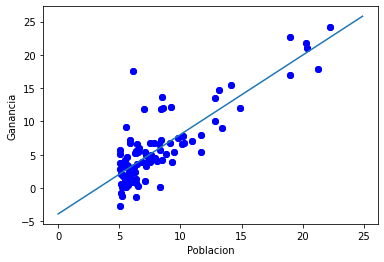

In [1]:
from urllib import request
import numpy as np
import matplotlib.pyplot as plt

example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/mc.txt"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

# Genero columnas de poblacion y ganancia segun el dataset
poblacion = np.reshape(np.array(dataset[:,0]), (len(dataset), 1))
ganancia_real = np.reshape(np.array(dataset[:,1]), (len(dataset), 1))

# Genero columna de unos
unos = np.ones((len(dataset), 1))

# Genero una matriz de 1s y la poblacion
x = np.append(unos, poblacion, axis = 1)

# Obtengo la pseudoinversa de esa matriz
x_inv = np.linalg.pinv(x)

# Calculo w estrella
w_estrella = np.dot(np.dot(np.linalg.inv(np.dot(x.transpose(), x)), x.transpose()), ganancia_real)

b = w_estrella[0]
w = w_estrella[1]

# Calculo la columna de ganancia predicha
ganancia_predicha = np.dot(x, w_estrella)

# CAlculo el error cuadratico medio
emc = (np.square(ganancia_real - ganancia_predicha)).mean()
print("El EMC es: ", emc)

# Grafico
plt.scatter(poblacion, ganancia_real, c = "blue")
rg_x = np.arange(0, 25, 0.1)

y = w * rg_x + b

plt.plot(rg_x,y)
plt.scatter(poblacion, ganancia_real, c= "blue")
plt.xlabel("Poblacion")
plt.ylabel("Ganancia")
plt.show()

###2) Estimar la ganancia con 3.5 personas

In [2]:
print("La ganancia estimada para cuando la poblacion es 3.5 M es: ", w * 3.5 + b)

La ganancia estimada para cuando la poblacion es 3.5 M es:  [0.27983688]


###3) Graficar el problema de optimización en 3-D (bias - weight y Risk) para todos los theta posibles (theta es pesos)

Text(0.5, 0, 'cost')

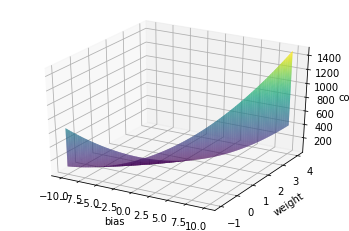

In [3]:
pts = 100
theta0_vals = np.linspace(-10, 10, pts)
theta1_vals = np.linspace(-1, 4, pts)
J_vals = np.zeros([pts,pts])
for i in range(pts):
    for j in range(pts):
      t = np.r_[theta0_vals[i], theta1_vals[j]]
      J_vals[i,j] = np.mean((np.dot(x,t)-dataset[:,1])**2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_xlabel('bias')
ax.set_ylabel('weight')
ax.set_zlabel('cost')

###4) Resolver el problema con GD

In [14]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

model.summary()

# Sin stopping
""" 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss='MeanSquaredError')
hist = model.fit(x=poblacion, y=ganancia_real, batch_size = 97, epochs= 400)
"""

# Hasta convergencia
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)                             # EarlyStopping: determino cuando pare el algoritmo
print(es)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'MeanSquaredError')
hist = model.fit(x=poblacion, y=ganancia_real, batch_size = 97, epochs=100,callbacks=[es]) # Batch_size: tamaño de la muestra
                                                                                              # Epochs: cantidad de iteraciones que realice para entrenar
                                                                                              # (va a terminar antes de los 100000 por el early stopping )
losses = np.array(hist.history['loss'])                                                       # losses es una lista con los errores cometidos en cada epoch
param = model.get_weights()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 175ms/step - loss: 484.0866
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 208.0964
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 93.4520
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 45.8221
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 26.0264
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 17.7917
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 14.3589
Epoch 8/100
1/1 [=============

###5) Plotear riesgo vs epochs

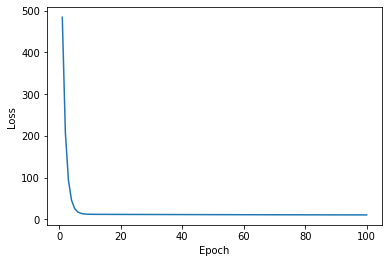

In [15]:
# Grafico de riesgo (loss - emc) vs epoch
epochs = np.arange(1, 101, 1)
plt.plot(epochs,losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

###6) Chequear el LR òptimo y predecir



El LR óptimo es de 0.01

In [16]:
prediction = model.predict(x=np.array([3.5]))                                                   # Predice la ganancia cuando la poblacion es 3.5 M
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[2.1482997]]
